In [2]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

exp_path = '../brca_metabric/data_mrna_illumina_microarray_zscores_ref_diploid_samples.txt'
exp = pd.read_csv(exp_path, sep='\t', index_col=0)
exp = exp.drop(exp.columns[0], axis=1).T
exp = exp.apply(lambda row: row.fillna(row.mean()), axis=1)
# exp.index = [i[:-3] for i in exp.index]

In [3]:
exp

Hugo_Symbol,RERE,RNF165,PHF7,CIDEA,TENT2,SLC17A3,SDS,ATP6V1C2,F3,FAM71C,...,SBF2-AS1,VN1R4,TRPV5,UGGT1,CR590356,VPS72,CSMD3,CC2D1A,IGSF9,FAM71A
MB-0362,-0.7139,-0.4606,-0.3325,-0.0129,-0.7853,0.7630,0.8752,-0.5499,-1.3871,0.2502,...,-0.9255,-0.8829,-0.1723,0.1334,-1.0066,-0.2908,-0.5286,0.0068,0.4053,-1.1278
MB-0346,1.2266,0.3564,-1.0617,-1.0394,0.0337,-0.5175,-0.5610,3.6712,-1.1852,-0.8299,...,0.1311,1.0630,1.1693,0.3583,0.5890,0.3443,-0.4379,-0.7520,1.2968,0.0321
MB-0386,-0.0053,-0.6800,0.2587,3.2991,-0.6649,0.6719,0.1445,-0.2674,-1.0100,-1.4008,...,-1.0253,0.3808,0.5185,0.6112,-0.4885,0.4818,6.9258,0.0519,0.7962,0.6608
MB-0574,-0.4399,-1.0563,-0.2982,-0.2632,2.1640,-1.1036,-0.0361,-0.4254,-1.1183,0.8459,...,0.5099,-0.0873,-0.1654,0.2424,-0.4413,0.2503,1.0466,0.2502,-0.1634,-0.3571
MB-0185,-0.5958,-0.0377,-1.2422,-1.0949,-0.2031,-0.9250,-0.6270,-1.1306,-1.2610,0.1368,...,0.6759,-0.6561,0.9105,-0.0125,-1.2438,-0.1057,-0.1060,-0.3376,-0.2418,-1.0923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MB-5453,1.1339,1.3429,-0.0587,-0.4324,0.6082,-0.3136,-1.1075,0.3955,2.4321,0.1945,...,-1.9816,-2.0062,0.3873,-1.1099,0.0085,-1.5529,0.0706,2.5337,0.3254,0.5514
MB-5471,0.0259,0.5726,0.5240,-0.0336,0.5608,-0.6894,-0.1793,-0.1489,-0.0958,-0.3498,...,-0.5997,0.0217,-0.1358,0.2207,-0.1661,-0.6349,0.1188,-0.8272,0.8187,-0.9335
MB-5127,-0.3529,0.1731,-0.0311,-0.4003,2.4222,0.6773,1.5110,-0.8557,-0.0595,-0.6682,...,-1.4550,0.4095,0.9970,-0.5989,-0.5521,-0.8160,-0.3231,-0.1200,-0.5648,0.1794
MB-4313,-1.2327,0.5482,4.4925,2.4698,-3.2853,0.9610,2.1707,0.5251,0.1038,-2.7623,...,6.2771,0.5365,0.6137,3.9511,2.9130,-1.0902,-0.1251,4.2708,0.5931,0.0860


In [4]:
def umap_show(data):

    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.T).T

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
    embedding_umap = reducer.fit_transform(data_scaled)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')
    plt.title('UMAP projection of gene expression data')
    plt.xlabel('UMAP 1')
    plt.ylabel('UMAP 2')
    plt.show()


In [5]:
def tsne_show(data):
    tsne = TSNE(n_components=2, random_state=42)
    embedding_tsne = tsne.fit_transform(data)
    
    plt.figure(figsize=(8,6))
    plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')
    plt.title('t-SNE projection of gene expression data')
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()


In [6]:
import pandas as pd
import numpy as np
import scipy.cluster.hierarchy as sch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def hierarchical_clustering(df):

    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), index=df.index, columns=df.columns)
    

    distance_matrix = sch.distance.pdist(df_scaled, metric='euclidean')

    print(distance_matrix)
    

    linkage_matrix = sch.linkage(distance_matrix, method='ward')

    print(linkage_matrix)
    

    plt.figure(figsize=(10, 7))
    sch.dendrogram(linkage_matrix, labels=df.index, orientation='top')
    plt.title('Dendrogram')
    plt.xlabel('Sample')
    plt.ylabel('Distance')
    plt.show()


In [7]:
import torch

embedding = torch.load('./embedding/embedding_20240920_121932.pt', map_location=torch.device('cpu'))
embedding = pd.DataFrame(embedding.numpy())

In [8]:
embedding

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-10.889692,23.638786,6.055796,10.711037,-1.350682,-10.228221,-13.307486,-9.544641,-0.934222,-0.670716,...,11.183018,-18.841158,6.367283,0.274951,-11.942492,-4.358015,9.466736,-6.668755,-17.206394,0.369050
1,-4.081928,1.333870,0.253406,-1.676755,-11.823484,-3.553319,-4.613044,-0.600981,-1.138694,0.172554,...,9.349221,0.450301,-9.395136,4.349864,0.691991,5.398480,5.183525,-2.936499,-0.522402,5.838850
2,2.006955,19.191324,2.961970,16.290585,-14.890520,19.658371,-22.859921,6.150797,-0.420841,-24.283436,...,-13.473847,4.667075,5.178034,17.440460,4.518616,17.432240,-12.105092,-11.080098,-21.137440,-15.912732
3,2.522500,20.277033,4.707723,12.886784,-8.486010,21.182608,-24.024139,-0.324061,7.603878,-24.849777,...,-15.999007,3.113246,3.051430,14.762068,3.211316,10.623815,-9.032424,-14.547500,-19.402168,-15.903008
4,-5.206199,8.174999,-4.157253,2.864892,-10.335752,1.692896,-9.239659,5.203667,-6.182530,7.864827,...,19.756983,-14.254458,1.235117,1.569829,2.475754,18.263681,5.716113,-2.516424,-8.501097,8.895384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,1.706745,9.340458,6.070684,2.150624,-0.750394,5.817724,-7.136880,-8.975007,6.758445,-2.695348,...,1.942385,-5.063432,-1.499474,-1.792612,-1.565906,1.276109,2.010619,-4.710705,-1.588526,1.412631
1462,-3.948049,5.979322,5.267154,2.374247,-5.563100,9.268428,4.037346,-6.021324,-2.975959,-1.963321,...,4.693981,-2.464527,3.032100,0.043062,6.332963,4.213205,-1.658967,0.321490,-3.755279,2.395268
1463,-0.346014,13.537127,4.985197,2.176107,7.232089,2.071815,-10.230189,-12.045326,8.548037,-3.221628,...,-0.052762,-7.656553,1.048890,-2.095929,-4.521819,-4.732865,5.578979,-10.995011,-5.690257,1.774111
1464,-2.998340,5.458544,7.113435,1.968390,-2.623773,10.629930,7.759568,-7.272551,-2.441521,-3.898269,...,2.269867,0.424354,4.233748,0.451883,7.815109,4.633636,-4.975760,1.432479,-1.477992,2.508894


c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27068\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


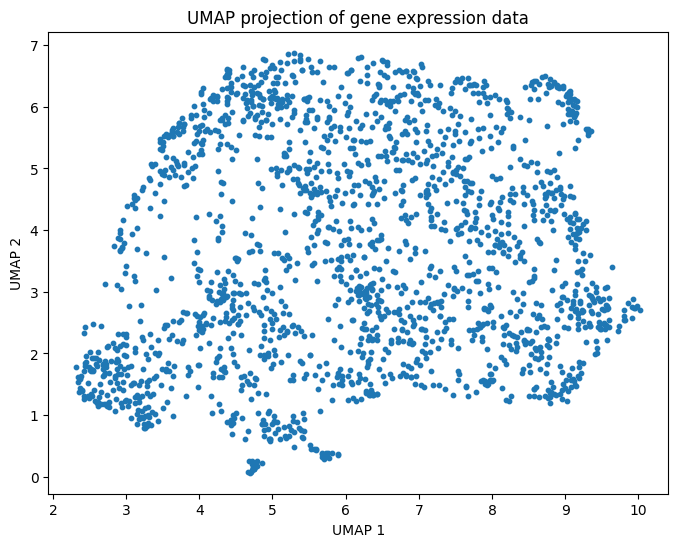

c:\users\zhengzh\appdata\local\programs\python\python38\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27068\617476752.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_umap[:, 0], embedding_umap[:, 1], s=10, cmap='Spectral')


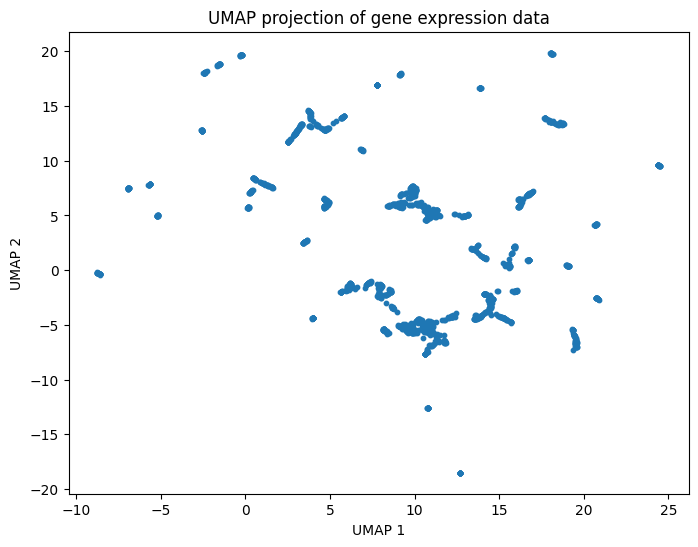

(None, None)

In [9]:
# original data exp and embedding after barlow_twins
umap_show(exp), umap_show(embedding)

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27068\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


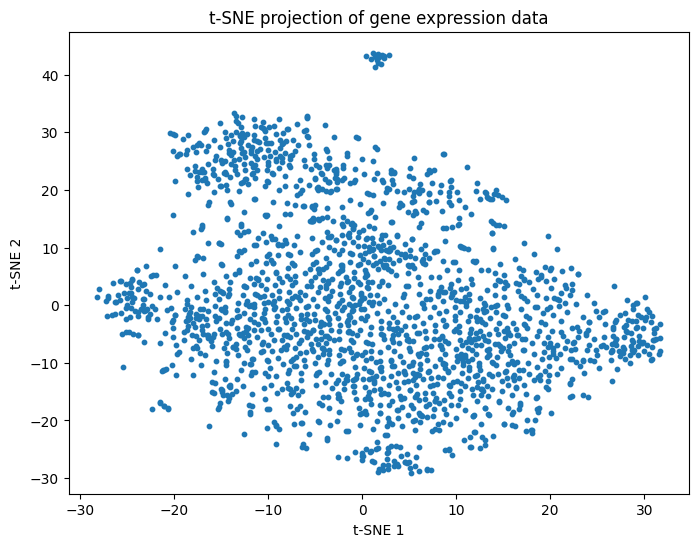

C:\Users\zhengzh\AppData\Local\Temp\ipykernel_27068\1245652910.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding_tsne[:, 0], embedding_tsne[:, 1], s=10, cmap='Spectral')


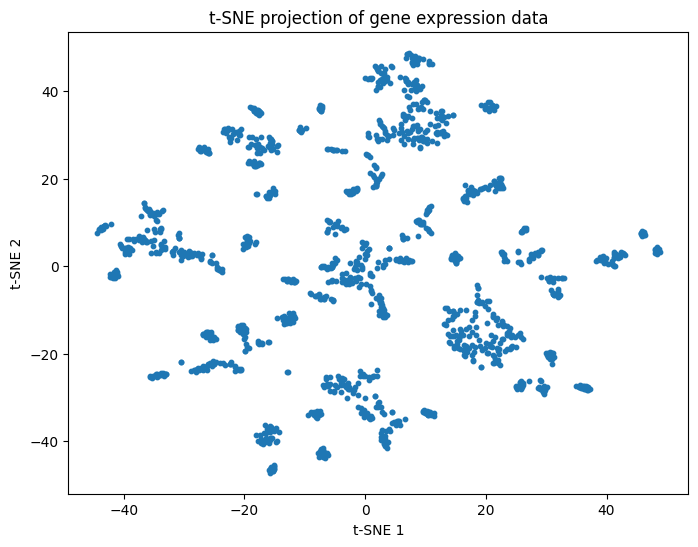

(None, None)

In [10]:
# original data exp and embedding after barlow_twins
tsne_show(exp), tsne_show(embedding)

[197.16617541 157.33776346 168.4936729  ... 338.02610238 195.60520795
 338.33382745]
[[1.92600000e+03 1.92700000e+03 1.19041220e+02 2.00000000e+00]
 [1.44700000e+03 1.52600000e+03 1.22023714e+02 2.00000000e+00]
 [9.29000000e+02 1.04700000e+03 1.22583143e+02 2.00000000e+00]
 ...
 [3.95200000e+03 3.95500000e+03 1.29865388e+03 1.67000000e+03]
 [3.93800000e+03 3.95600000e+03 1.49032314e+03 1.88400000e+03]
 [3.94400000e+03 3.95700000e+03 1.70260079e+03 1.98000000e+03]]


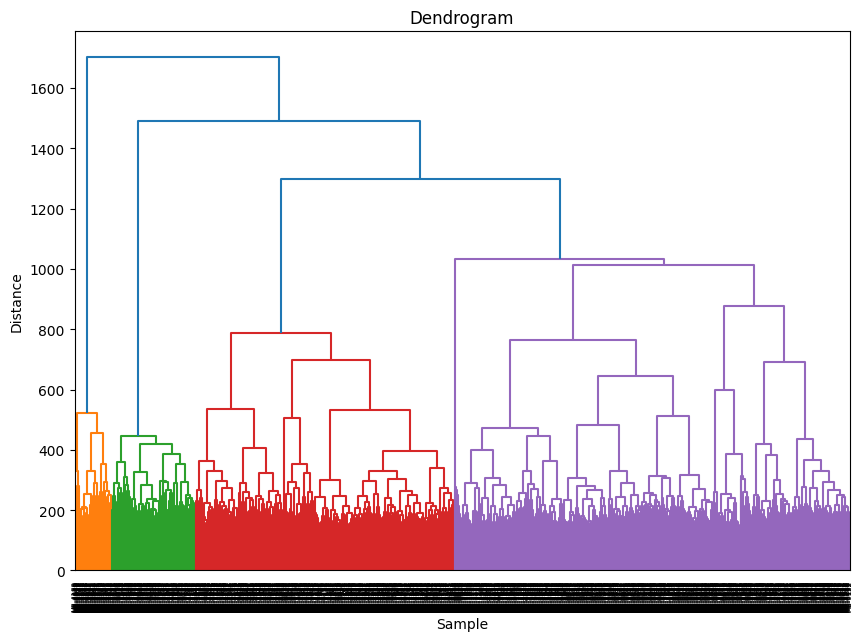

In [11]:
hierarchical_clustering(exp)

[11.92112426 17.96681819 16.50749683 ...  7.63919693 13.29762334
 12.23685529]
[[5.10000000e+01 1.35000000e+02 1.16778468e-01 2.00000000e+00]
 [1.20200000e+03 1.31600000e+03 1.16839920e-01 2.00000000e+00]
 [1.41000000e+02 4.02000000e+02 1.38994902e-01 2.00000000e+00]
 ...
 [2.90700000e+03 2.92700000e+03 1.08143679e+02 1.34600000e+03]
 [2.91700000e+03 2.92800000e+03 1.25018541e+02 1.44900000e+03]
 [2.88200000e+03 2.92900000e+03 1.58916087e+02 1.46600000e+03]]


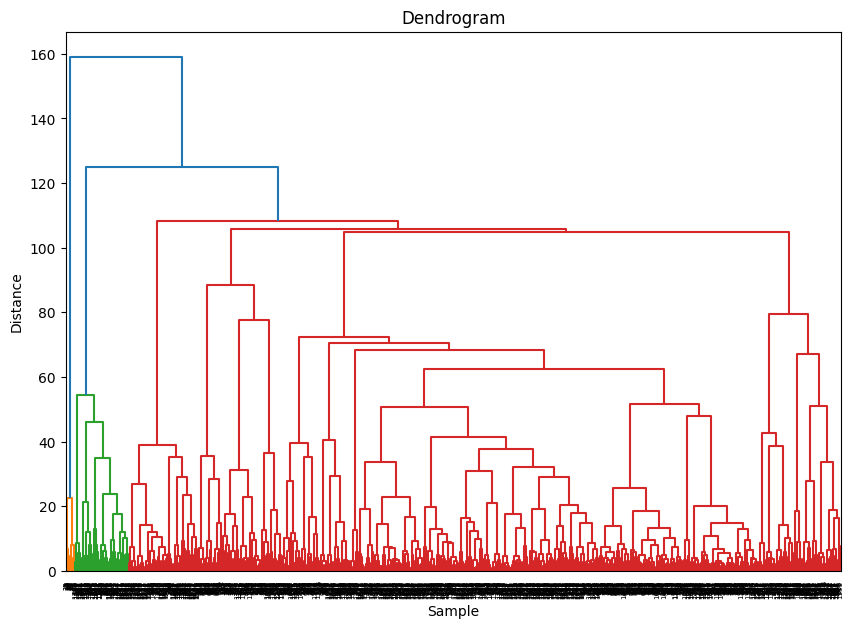

In [12]:
hierarchical_clustering(embedding)